In [2]:
import pandas as pd

data = pd.read_pickle('pickle/dtm.pkl')
data = data.transpose()
data.head()

,challenges,leparisien
accueillir,0,1
accélération,0,1
acier,1,1
adorer,0,1
affiche,0,1


In [3]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'challenges': [('cybertruck', 4),
  ('tesla', 3),
  ('trois', 3),
  ('musk', 3),
  ('elon', 3),
  ('dollars', 3),
  ('commandes', 2),
  ('km', 2),
  ('passer', 2),
  ('pourra', 2),
  ('dautonomie', 2),
  ('vitre', 2),
  ('production', 2),
  ('véhicule', 2),
  ('moteur', 2),
  ('fin', 2),
  ('modèles', 2),
  ('ni', 1),
  ('offre', 1),
  ('motrices', 1),
  ('deuxième', 1),
  ('daucune', 1),
  ('dire', 1),
  ('date', 1),
  ('pdg', 1),
  ('cours', 1),
  ('pickup', 1),
  ('précise', 1),
  ('commentaires', 1),
  ('publicité', 1)],
 'leparisien': [('tesla', 11),
  ('pickup', 6),
  ('cybertruck', 5),
  ('etatsunis', 4),
  ('dune', 4),
  ('musk', 4),
  ('véhicule', 4),
  ('aussi', 3),
  ('version', 3),
  ('partir', 3),
  ('va', 3),
  ('gros', 3),
  ('km', 3),
  ('dollars', 3),
  ('modèle', 3),
  ('runner', 3),
  ('elon', 3),
  ('marché', 3),
  ('blade', 3),
  ('rentabilité', 2),
  ('tonnes', 2),
  ('inspiré', 2),
  ('commercialisée', 2),
  ('droit', 2),
  ('pourra', 2),
  ('prix', 2),
  ('troi

In [4]:
for journal, top_words in top_dict.items():
    print(journal)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

challenges
cybertruck, tesla, trois, musk, elon, dollars, commandes, km, passer, pourra, dautonomie, vitre, production, véhicule
---
leparisien
tesla, pickup, cybertruck, etatsunis, dune, musk, véhicule, aussi, version, partir, va, gros, km, dollars
---


In [5]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

wc = WordCloud(stopwords=stopwords.words('french'), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [14]:
data_clean = pd.read_pickle("pickle/articles_clean.pkl")
data_clean

,text
challenges,près de précommandes pour le cybertruck de te...
leparisien,tesla dévoile un pickup électrique sorti tout ...


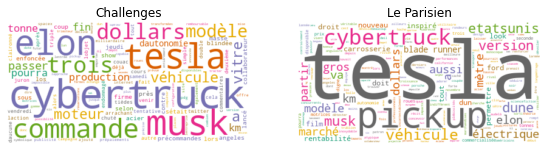

In [17]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

journaux = ['Challenges', 'Le Parisien']

for index, journal in enumerate(data.columns):
    wc.generate(data_clean.text[journal])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(journaux[index])
    
plt.show()